# Lab-based Group Assignment 3: 
## Signature Authentication to Prevent Fraud Transactions in Business



![Imgur](https://i.imgur.com/4HJknC2.png)

### Computer Vision for Business Applications

![Imgur](https://i.imgur.com/Y8NCtmr.png)

Credit: Cybiant Knowledge Centre

### Convolutional Neural Networks (CNNs)

![Imgur](https://i.imgur.com/TIhKQbJ.png)


Credit: *Chollet, Francois. Deep Learning with Python* 

### Structure of Convolutional Neural Networks (CNNs)

- Convolution
- Pooling
- Fully Connected networks



![Imgur](https://i.imgur.com/GuL5bre.png)

![Imgur](https://i.imgur.com/KkJ2jSj.png)

https://cs231n.github.io/convolutional-networks/



Credit by CNNs for Visual Reconginition

![Imgur](https://i.imgur.com/hWd6KoG.png)

![Imgur](https://i.imgur.com/feA9idS.png)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

### **Business Problem**
In a legal context, a signature is your name written in a distinct, personalized form as a way of identifying yourself to authorize a document. Using signiture for identity validation is still a global-wide practice for legal authentication.

In order to **prevent fraud transactions, a bank’s established practice** is to compare the signature on a request to the signature maintained in the bank’s file system and to confirm that the request is issued by the correct issuer.

Without modern signiture authentication technology, banks around the world had suffered huge losses against fraud transaction in which  signitures are maliciously forged.
\
\
(Optional) Read More about a real-life signiture-related legal case:  
<a href="http://www.joneslemongraham.com/blog/banks-loss-a-covered-forgery-under-insuring-agreement-d-of-financial-institution-bond-and-not-excluded-by-loan-loss-exclusion/#.X2bDBy9h1PM">Bank of Ann Arbor v. Everest National Insurance Company, Case No. 12-11251 (E.D. Mi. Feb. 25, 2013)</a>
\
\
Luckily, we have advanced computer vision technology, which can conveniently and accurately identify forged signitures.


![Imgur](https://i.imgur.com/f9Ozq9M.png)

<img src="https://storage.googleapis.com/kaggle-datasets-images/107946/257611/57ea0c6f63a05a981b18eb7ad5547464/dataset-cover.png?t=2019-01-20-18-39-59">

### **Task**
Build a deep learning model to classify forged signatures from genuine signitures to prevent fraud transactions in businesses. 

---

In [ ]:
# First things first: Please select a GPU backend.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
Click the folder button on the left, and Colab will display a file window. (Probably you might have to wait for at most 10 seconds, before the `drive` folder shows up.) Find the zip file `signature-verification-dataset.zip` under the drive folder.  

Right click the file and select "copy path". Now the file path is on your clip board. Paste the path inside the double quote in the next code chunk.

### Q1: Please unzip, read and seperate the dataset for the model?

In [ ]:
# Unzip signature-verification-dataset.zip to "/content" directory. 
!unzip -q "/content/drive/MyDrive/deep learning/Practice Files -- Lab 3/signature-verification-dataset.zip" -d /content/

In [ ]:
import pandas as pd
# Load data
train_df=pd.read_csv("/content/sign_data/train_data.csv",header=None,usecols=[1,2],names=["file_name","forged"],dtype=str)
test_df=pd.read_csv("/content/sign_data/test_data.csv",header=None,usecols=[1,2],names=["file_name","forged"],dtype=str)

# Train Test Split
from sklearn.model_selection import train_test_split
train_df, validation_df=train_test_split(train_df,train_size=0.8)
print(train_df.shape,validation_df.shape,test_df.shape)

(18564, 2) (4642, 2) (5748, 2)


In [ ]:
display(train_df)
# See how many genuine/forged signitures in train data?
train_df.forged.value_counts()

,file_name,forged
23103,031/11_031.png,0
5139,012/012_12.PNG,0
16319,052_forg/03_0210052.PNG,1
19360,034_forg/02_0120034.PNG,1
12463,055/02_055.png,0
...,...,...
19952,041/05_041.png,0
18549,015/015_17.PNG,0
17890,028_forg/04_0126028.PNG,1
6016,002_forg/0110002_02.png,1


0    10128
1     8436
Name: forged, dtype: int64

In [ ]:
# Define the data path, we will use it later.
path="/content/sign_data/"

In [ ]:
# The mode of image
from PIL import Image
Image.open("/content/sign_data/train/001/001_01.PNG").mode

'RGB'

### Q3: Please generate new dataset by using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Instantiate ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255)

# Configure train data generator
train_gen=train_datagen.flow_from_dataframe( 
    train_df,                                   # Pandas dataframe containing the filepaths relative to directory (or absolute paths if directory is None) of the images in a string column.
    directory="/content/sign_data/train",       # string, path to the directory to read images from. If None, data in x_col column should be absolute paths.
    x_col="file_name",                          # string, column in dataframe that contains the filenames (or absolute paths if directory is None).
    y_col="forged",                             # string or list, column/s in dataframe that has the target data.
    target_size=(128, 256),                     # tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.
    color_mode="rgb",                           # one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.
    class_mode="binary",                        # one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None. Default: "categorical".
    batch_size=32,                              # size of the batches of data (default: 32). 
    shuffle=True)                               # whether to shuffle the data (default: True)

# Configure validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen=val_datagen.flow_from_dataframe(
    validation_df,
    directory="/content/sign_data/train",
    x_col="file_name",
    y_col="forged",
    target_size=(128, 256),
    color_mode="rgb",
    class_mode="binary",
    )

# Configure test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen=test_datagen.flow_from_dataframe(
    test_df,
    directory="/content/sign_data/test",
    x_col="file_name",
    y_col="forged",
    target_size=(128, 256),
    color_mode="rgb",
    class_mode="binary",
    )

Found 18564 validated image filenames belonging to 2 classes.
Found 4642 validated image filenames belonging to 2 classes.
Found 5748 validated image filenames belonging to 2 classes.


### Q4: Please use dense neural networks for predict the forged signatures. 

In [ ]:
# Build sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
model=Sequential()
model.add(Flatten())   # Flatten the channels into one single long array
model.add(Dense(2048 ,input_shape = (128*256*3,) ,activation = 'relu'))     
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['acc'])

history=model.fit(train_gen,                                # Train data generator
      steps_per_epoch=100,    # train_gen.n//train_gen.batch_size, Generator will generate data infinitely, so you'll need to sepcify this parameter.
      epochs=10,                                             #                                                个
      validation_data=val_gen,                              # Validation data generator                      个
      validation_steps=100)       # val_gen.n//val_gen.batch_size, Need to sepcify this parameter. Reason same as 个.         "//" means get the integer part from division result.

Epoch 1/10
100/100 [==============================] - 26s 254ms/step - loss: 27.0108 - acc: 0.5034 - val_loss: 8.2178 - val_acc: 0.4728
Epoch 2/10
100/100 [==============================] - 25s 249ms/step - loss: 5.5415 - acc: 0.5134 - val_loss: 1.7646 - val_acc: 0.5303
Epoch 3/10
100/100 [==============================] - 34s 343ms/step - loss: 2.9682 - acc: 0.5022 - val_loss: 0.7212 - val_acc: 0.4784
Epoch 4/10
100/100 [==============================] - 25s 247ms/step - loss: 0.9034 - acc: 0.5691 - val_loss: 0.9679 - val_acc: 0.5353
Epoch 5/10
100/100 [==============================] - 25s 247ms/step - loss: 1.0718 - acc: 0.5628 - val_loss: 0.9862 - val_acc: 0.5341
Epoch 6/10
100/100 [==============================] - 25s 249ms/step - loss: 1.0631 - acc: 0.5547 - val_loss: 0.5903 - val_acc: 0.6700
Epoch 7/10
100/100 [==============================] - 34s 343ms/step - loss: 0.7557 - acc: 0.5834 - val_loss: 0.7032 - val_acc: 0.5431
Epoch 8/10
100/100 [==============================] - 

### Q5: Please use CNNs to predict the forged signatures with high accuracy. 

### Larger Convolution Model

In [ ]:
# Build sequential model
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
model=Sequential()
model.add(Conv2D(128, 3,input_shape=(128,256,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.5))                                                         # Add Dropout layer, randomly drops 50% neurons from propagation.
model.add(Dense(32,activation="relu", kernel_regularizer="l2"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['acc'])

# Configure EarlyStopping object
Es=EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=100, #train_gen.n//train_gen.batch_size
      epochs=10,
      validation_data=val_gen,
      validation_steps=100, #val_gen.n//val_gen.batch_size
      callbacks=[Es])                                                           # Here is how we use EarlyStopping

Epoch 1/10
100/100 [==============================] - 56s 270ms/step - loss: 0.8661 - acc: 0.6216 - val_loss: 0.6465 - val_acc: 0.8519
Epoch 2/10
100/100 [==============================] - 27s 268ms/step - loss: 0.4685 - acc: 0.9084 - val_loss: 0.3783 - val_acc: 0.9331
Epoch 3/10
100/100 [==============================] - 26s 265ms/step - loss: 0.2833 - acc: 0.9534 - val_loss: 0.2630 - val_acc: 0.9400
Epoch 4/10
100/100 [==============================] - 27s 268ms/step - loss: 0.2319 - acc: 0.9569 - val_loss: 0.1636 - val_acc: 0.9812
Epoch 5/10
100/100 [==============================] - 27s 269ms/step - loss: 0.1519 - acc: 0.9776 - val_loss: 0.1437 - val_acc: 0.9734
Epoch 6/10
100/100 [==============================] - 26s 265ms/step - loss: 0.1737 - acc: 0.9663 - val_loss: 0.1249 - val_acc: 0.9856
Epoch 7/10
100/100 [==============================] - 27s 267ms/step - loss: 0.1849 - acc: 0.9628 - val_loss: 0.1357 - val_acc: 0.9903
Epoch 8/10
100/100 [==============================] - 2

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 254, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 127, 128)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 125, 64)       73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 119040)            0         
                                                                 
 dropout (Dropout)           (None, 119040)           

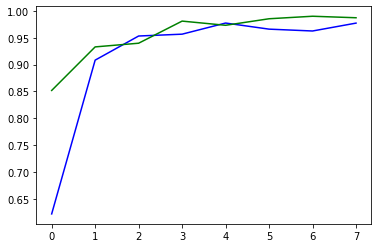

In [ ]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='g')
plt.show()

In [ ]:
# Evaluate test data accuracy.
model.evaluate(test_gen)

180/180 [==============================] - 25s 137ms/step - loss: 0.1563 - acc: 0.9687


[0.15627604722976685, 0.968684732913971]

### Underfitting and Overfitting

![Imgur](https://i.imgur.com/pQedNv0.png)

### Convolution Model

In [ ]:
# Final version
# Build sequential model
model=Sequential()
model.add(Conv2D(128, 3,input_shape=(128,256,3),activation="relu"))
model.add(MaxPooling2D(2))
#model.add(Conv2D(64, 3,activation="relu"))
#model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.5))                                                         # Add Dropout layer, randomly drops 50% neurons from propagation.
model.add(Dense(32,activation="relu", kernel_regularizer="l2"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['acc'])

# Configure EarlyStopping object
Es=EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=100, #train_gen.n//train_gen.batch_size
      epochs=10,
      validation_data=val_gen,
      validation_steps=100, #val_gen.n//val_gen.batch_size
      callbacks=[Es])                                                           # Here is how we use EarlyStopping

Epoch 1/10
100/100 [==============================] - 30s 293ms/step - loss: 2.8426 - acc: 0.5183 - val_loss: 1.2384 - val_acc: 0.5288
Epoch 2/10
100/100 [==============================] - 29s 290ms/step - loss: 0.9875 - acc: 0.5584 - val_loss: 0.8452 - val_acc: 0.5316
Epoch 3/10
100/100 [==============================] - 29s 288ms/step - loss: 0.7894 - acc: 0.5303 - val_loss: 0.7444 - val_acc: 0.5263
Epoch 4/10
100/100 [==============================] - 29s 290ms/step - loss: 0.7235 - acc: 0.5412 - val_loss: 0.7094 - val_acc: 0.5350
Epoch 5/10
100/100 [==============================] - 29s 289ms/step - loss: 0.7025 - acc: 0.5547 - val_loss: 0.6966 - val_acc: 0.5419
Epoch 6/10
100/100 [==============================] - 29s 290ms/step - loss: 0.6941 - acc: 0.5522 - val_loss: 0.6991 - val_acc: 0.5369
Epoch 7/10
100/100 [==============================] - 29s 289ms/step - loss: 0.6918 - acc: 0.5441 - val_loss: 0.6922 - val_acc: 0.5281
Epoch 8/10
100/100 [==============================] - 2

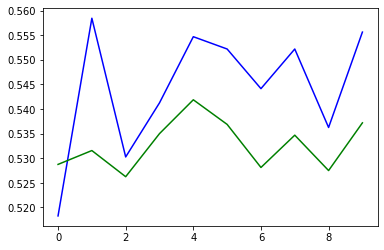

In [ ]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='g')
plt.show()

This simple convolution model's performance is similar to dense model. 

### Basic Convolution Model

In [ ]:
# Intermediate version
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback

model=Sequential()                                                      
model.add(Conv2D(128, 3,input_shape=(128, 256,3),activation="relu"))     # The first convolution layer: 16 filters with size 3x3.
model.add(MaxPooling2D(2))                                              # Pooling: MaxPooling
model.add(Flatten())                                                    # Flatten the output of pooling layer i.e. create a long array
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",                               # This is binary classification
              optimizer="adam",                                         # Adam optimizer
              metrics=['acc'])                                          # Monitoring the accuracy

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=100, #train_gen.n//train_gen.batch_size
      epochs=10,
      validation_data=val_gen,
      validation_steps=100) #val_gen.n//val_gen.batch_size

Epoch 1/10
100/100 [==============================] - 29s 285ms/step - loss: 1.3497 - acc: 0.7563 - val_loss: 0.2004 - val_acc: 0.9303
Epoch 2/10
100/100 [==============================] - 28s 282ms/step - loss: 0.1012 - acc: 0.9688 - val_loss: 0.0418 - val_acc: 0.9881
Epoch 3/10
100/100 [==============================] - 28s 281ms/step - loss: 0.0262 - acc: 0.9934 - val_loss: 0.0217 - val_acc: 0.9947
Epoch 4/10
100/100 [==============================] - 28s 281ms/step - loss: 0.0056 - acc: 0.9987 - val_loss: 0.0111 - val_acc: 0.9984
Epoch 5/10
100/100 [==============================] - 28s 281ms/step - loss: 0.0061 - acc: 0.9991 - val_loss: 0.0088 - val_acc: 0.9984
Epoch 6/10
100/100 [==============================] - 28s 282ms/step - loss: 0.0030 - acc: 0.9997 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 28s 284ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.2308e-04 - val_acc: 1.0000
Epoch 8/10
100/100 [==============================]

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 254, 128)     3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 127, 128)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024128)           0         
                                                                 
 dense_8 (Dense)             (None, 64)                65544256  
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                      

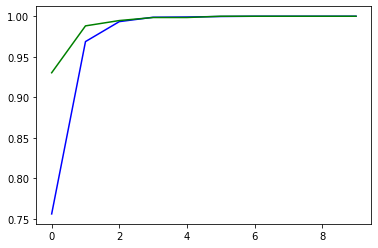

In [ ]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='g')
plt.show()

In [ ]:
model.evaluate(test_gen)

180/180 [==============================] - 24s 131ms/step - loss: 1.4695e-04 - acc: 1.0000


[0.00014695124991703779, 1.0]

In [ ]:
model.save('/content/lab3.h5')